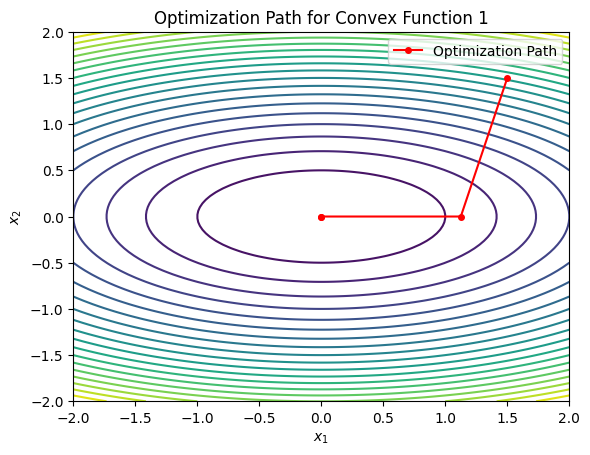

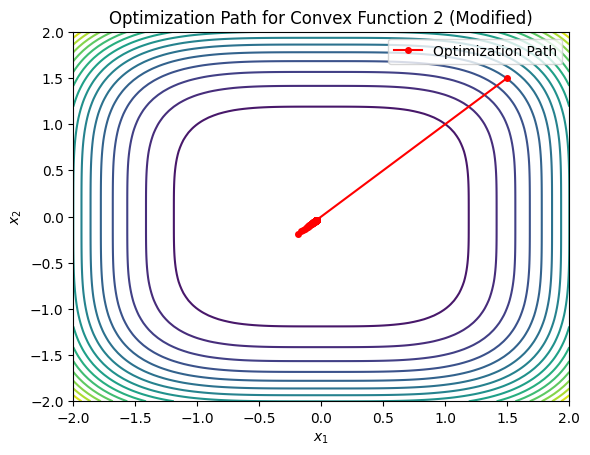

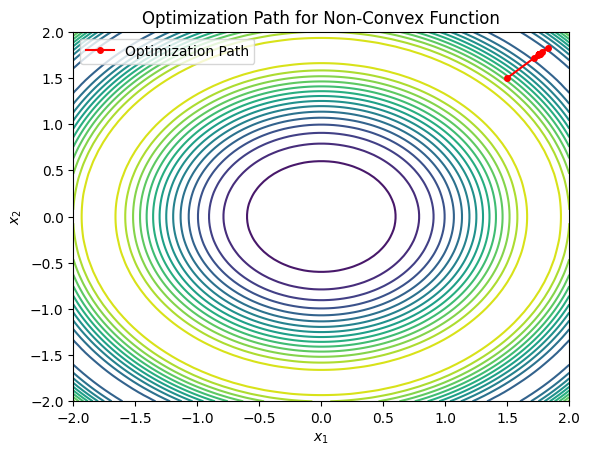

array([[1.5       , 1.5       ],
       [1.82907379, 1.82907379],
       [1.71552849, 1.71552849],
       [1.77702037, 1.77702037],
       [1.74760806, 1.74760806],
       [1.7637793 , 1.7637793 ],
       [1.75524966, 1.75524966],
       [1.75987578, 1.75987578],
       [1.75739939, 1.75739939],
       [1.75873504, 1.75873504],
       [1.75801746, 1.75801746],
       [1.7584038 , 1.7584038 ],
       [1.75819603, 1.75819603],
       [1.75830784, 1.75830784],
       [1.75824769, 1.75824769],
       [1.75828005, 1.75828005],
       [1.75826264, 1.75826264],
       [1.75827201, 1.75827201],
       [1.75826697, 1.75826697],
       [1.75826968, 1.75826968],
       [1.75826822, 1.75826822],
       [1.75826901, 1.75826901],
       [1.75826859, 1.75826859]])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for backtracking line search
alpha = 0.2
beta = 0.5
t_init = 1.0
tol = 1e-6
max_iter = 100

# Define the functions and their gradients
def convex_function_1(x):
    return x[0]**2 + 4 * x[1]**2

def grad_convex_function_1(x):
    return np.array([2 * x[0], 8 * x[1]])

def convex_function_2(x):
    return x[0]**4 + x[1]**4

def grad_convex_function_2(x):
    return np.array([4 * x[0]**3, 4 * x[1]**3])

def non_convex_function(x):
    return -np.cos(x[0]**2 + x[1]**2) + 0.1 * (x[0]**2 + x[1]**2)

def grad_non_convex_function(x):
    r_squared = x[0]**2 + x[1]**2
    grad_x1 = 2 * x[0] * (np.sin(r_squared) + 0.1)
    grad_x2 = 2 * x[1] * (np.sin(r_squared) + 0.1)
    return np.array([grad_x1, grad_x2])

# Gradient descent with backtracking
def gradient_descent_with_backtracking(func, grad_func, x0, name):
    x = x0
    trajectory = [x]
    
    for _ in range(max_iter):
        grad = grad_func(x)
        t = t_init
        
        # Backtracking line search
        while func(x - t * grad) > func(x) - alpha * t * np.dot(grad, grad):
            t *= beta
        
        # Update step
        x_next = x - t * grad
        trajectory.append(x_next)
        
        # Check convergence
        if np.linalg.norm(x_next - x) < tol:
            break
            
        x = x_next

    trajectory = np.array(trajectory)
    plot_trajectory(func, trajectory, name)
    return trajectory

# Plotting function
def plot_trajectory(func, trajectory, name):
    x1_vals = np.linspace(-2, 2, 100)
    x2_vals = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = np.array([func([x1, x2]) for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = Z.reshape(X1.shape)
    
    plt.contour(X1, X2, Z, levels=20, cmap="viridis")
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', markersize=4, label="Optimization Path")
    plt.title(f"Optimization Path for {name}")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.show()

# Initial point and execution
x0 = np.array([1.5, 1.5])  # Starting point

# Run gradient descent with backtracking for each function
gradient_descent_with_backtracking(convex_function_1, grad_convex_function_1, x0, "Convex Function 1")
gradient_descent_with_backtracking(convex_function_2, grad_convex_function_2, x0, "Convex Function 2 (Modified)")
gradient_descent_with_backtracking(non_convex_function, grad_non_convex_function, x0, "Non-Convex Function")
